Plan
1. Read data.
2. Understand data types, distributions.
3. Explore columns with missing values.
4. Feature selection.

In [90]:
import numpy as np
import missingno as mn
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import sweetviz as sv

### 1. Read data

In [2]:
df = pd.read_csv('../data/train.csv', parse_dates=['job_posted_date'])
df_test = pd.read_csv('../data/test.csv', parse_dates=['job_posted_date'])

C:\Users\yurii\AppData\Local\Temp\ipykernel_20040\1530981748.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/train.csv', parse_dates=['job_posted_date'])
C:\Users\yurii\AppData\Local\Temp\ipykernel_20040\1530981748.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv('../data/test.csv', parse_dates=['job_posted_date'])


### 2. Understand data type, distributions

In [3]:
df.describe()

,obs,job_posted_date,feature_2,feature_10,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
count,1280.000000,1279,1280.000000,834.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,...,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,640.500000,2024-03-09 21:42:38.561376,0.592414,57.388489,0.195011,1.775129,-0.471561,-0.106538,-0.056146,-0.283087,...,-0.229636,-0.504288,-0.337300,-0.205454,0.062491,-0.289679,-0.125236,-0.609413,-0.697959,-0.065607
min,1.000000,2018-11-01 00:00:00,0.377300,6.000000,-0.763939,0.000000,-2.138069,-1.699230,-0.720396,-0.814064,...,-1.139693,-1.553501,-1.308425,-1.056830,-0.682076,-1.044931,-1.427914,-1.273351,-1.448333,-1.563567
25%,320.750000,2024-04-01 00:00:00,0.470400,36.000000,0.000000,1.644593,-0.650494,-0.266094,-0.140586,-0.428859,...,-0.381261,-0.694498,-0.503943,-0.367195,-0.000332,-0.416289,-0.220456,-0.779942,-0.913277,-0.155716
50%,640.500000,2024-07-01 00:00:00,0.599500,60.000000,0.199483,1.965052,-0.511752,-0.041913,-0.034192,-0.300990,...,-0.218812,-0.527023,-0.363801,-0.193773,0.044535,-0.300416,-0.102293,-0.666355,-0.789911,-0.048348
75%,960.250000,2024-07-01 00:00:00,0.685425,60.000000,0.362435,2.236504,-0.316367,0.043819,0.022705,-0.134271,...,-0.044063,-0.334472,-0.154570,0.000000,0.149352,-0.158362,0.000000,-0.533758,-0.584597,0.008720
max,1280.000000,2024-08-01 00:00:00,0.906300,300.000000,0.871714,3.954989,1.223969,1.065928,0.596698,0.384203,...,0.800289,0.429345,0.501037,0.741466,0.858132,0.208166,0.236223,0.000000,0.232129,0.460499
std,369.648482,NaN,0.108669,31.695205,0.223345,0.786083,0.291197,0.291319,0.145954,0.196887,...,0.230086,0.297868,0.243932,0.243926,0.142622,0.194618,0.160217,0.280257,0.333347,0.149354


In [4]:
df.head(2)

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,...,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1,Others,2024-07-01,High,NY,A,0.6429,False,False,True,...,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,2,Job_Title_1,2024-07-01,Low,CA,A,0.4678,False,False,False,...,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364


In [62]:
df.dtypes

obs                             int64
job_title                      object
job_posted_date        datetime64[ns]
salary_category                object
job_state                      object
                            ...      
job_desc_297                  float64
job_desc_298                  float64
job_desc_299                  float64
job_desc_300                  float64
salary_category_num             int64
Length: 318, dtype: object

In [6]:
df['salary_category'].value_counts()

salary_category
High      501
Low       419
Medium    360
Name: count, dtype: int64

In [ ]:
eda_report = sv.analyze(df,  pairwise_analysis='off')

                                             |          | [  0%]   00:00 -> (? left)

In [20]:
eda_report.show_html('../visuals/report.html') 

Report ../visuals/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
eda_report_test = sv.analyze(df_test,  pairwise_analysis='off')
eda_report_test.show_html('../visuals/report_test.html') 

                                             |          | [  0%]   00:00 -> (? left)

Report ../visuals/report_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
df['salary_category_num'] = df['salary_category'].map({'High': 2, 'Medium': 1, 'Low':0})

### 2.1. Distributions

In [17]:
def plot_timeline(df: pd.DataFrame) -> None:
    # Plot all categories in one plot with a legend
    plt.figure(figsize=(10, 6))
    for val in df['salary_category'].unique():
        df_cat = df.query('salary_category == @val')
        df_grouped = df_cat.groupby(['job_posted_date']).agg({'obs': 'count'})
        plt.plot(df_grouped.index, df_grouped['obs'], label=val)

    plt.xlabel('Job Posted Date')
    plt.ylabel('Count of Observations')
    plt.title('Observations by Job Posted Date and Salary Category')
    plt.legend(title='Salary Category')
    plt.show()

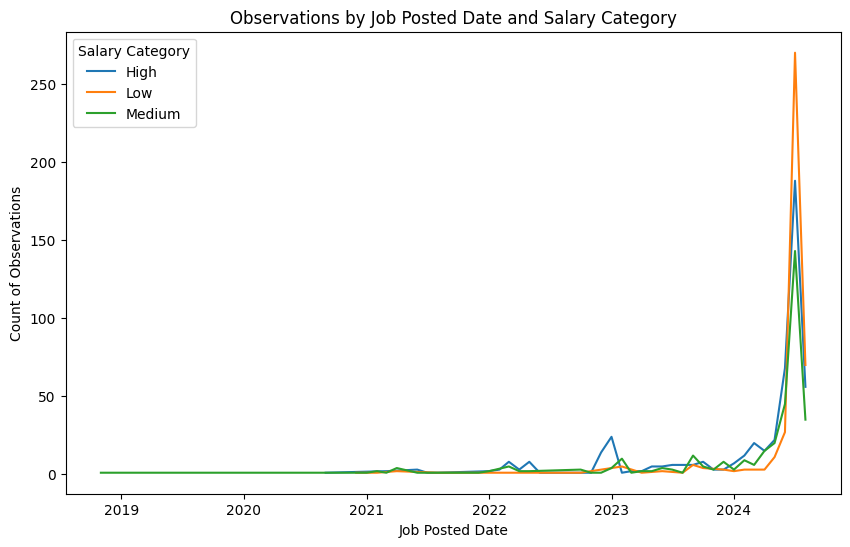

In [18]:
plot_timeline(df)

<AxesSubplot:xlabel='job_posted_date'>

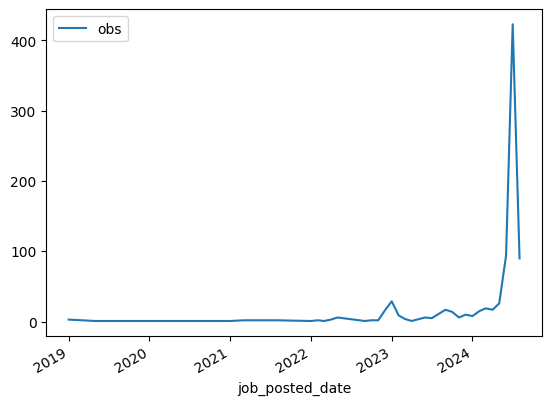

In [21]:
df_test.groupby('job_posted_date').agg({'obs': 'count'}).plot()

In [23]:
df['job_posted_date'].value_counts().head(10)

job_posted_date
2024-07-01    601
2024-08-01    161
2024-06-01    140
2024-05-01     53
2024-04-01     33
2024-03-01     29
2023-01-01     28
2023-09-01     24
2024-02-01     24
2023-10-01     17
Name: count, dtype: int64

In [24]:
df_test['job_posted_date'].value_counts().head(10)

job_posted_date
2024-07-01    423
2024-06-01     94
2024-08-01     90
2023-01-01     29
2024-05-01     26
2024-03-01     19
2024-04-01     17
2023-09-01     17
2022-12-01     16
2024-02-01     15
Name: count, dtype: int64

In [33]:
for data in [df, df_test]:
    print(data['job_posted_date'].min(), data['job_posted_date'].max())

2018-11-01 00:00:00 2024-08-01 00:00:00
2019-01-01 00:00:00 2024-08-01 00:00:00


In [37]:
[col for col in df.columns if df.dtypes[col] == 'object']

['job_title', 'salary_category', 'job_state', 'feature_1']

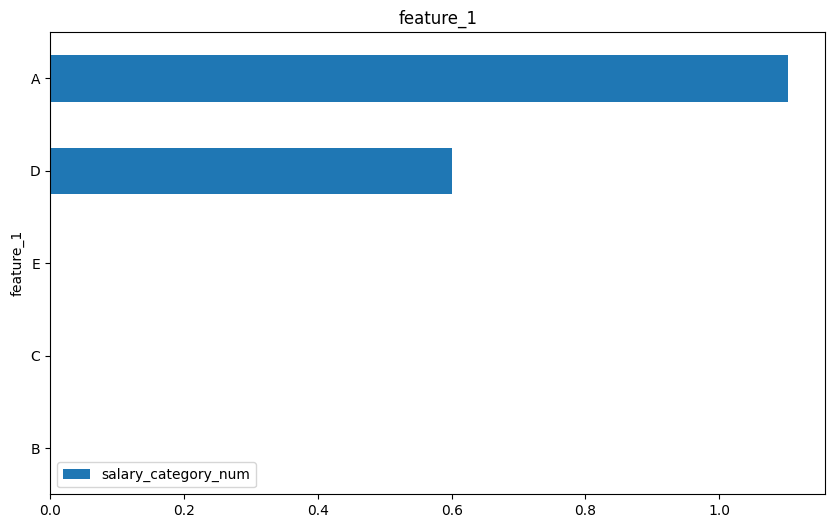

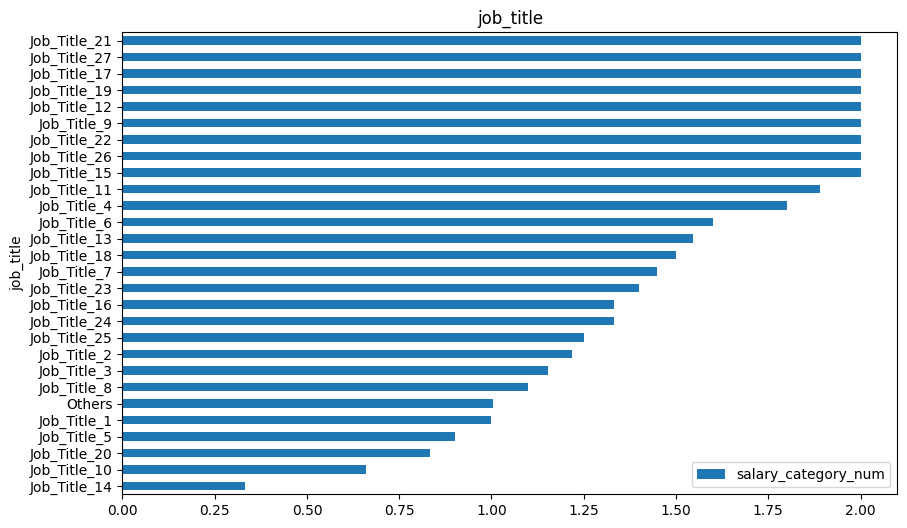

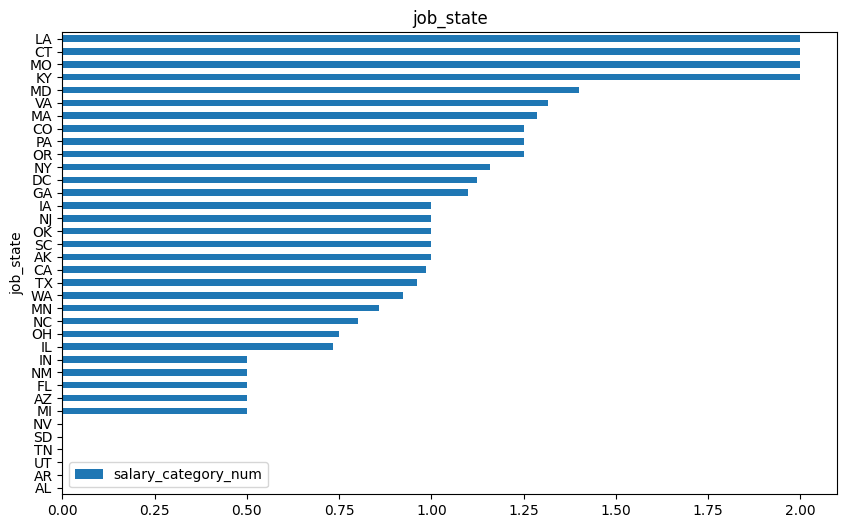

In [49]:
for feat in ['feature_1', 'job_title', 'job_state']:
    df.groupby(feat).agg({'salary_category_num': 'mean'}).sort_values(by='salary_category_num').plot(kind='barh', figsize=(10, 6), title=feat)

In [45]:
for val in df['feature_1'].unique():
    df_cat = df.query('feature_1 == @val')
    print(f"{val}: {df_cat['salary_category'].value_counts()}")

A: salary_category
High      500
Low       373
Medium    359
Name: count, dtype: int64
B: salary_category
Low    36
Name: count, dtype: int64
C: salary_category
Low    6
Name: count, dtype: int64
E: salary_category
Low    1
Name: count, dtype: int64
D: salary_category
Low       3
High      1
Medium    1
Name: count, dtype: int64


In [46]:
df_test['feature_1'].value_counts()

feature_1
A    819
B     26
D      4
C      3
E      2
Name: count, dtype: int64

In [48]:
df_notA = df.query("feature_1 != 'A'")
df_notA.query("salary_category == 'Low'").shape[0]/df_notA.shape[0]

0.9583333333333334

In [60]:
for title in df['job_title'].unique():
    df_filt = df.query('job_title == @title')
    df_stats = df_filt['salary_category'].value_counts()
    if df_stats.shape[0] == 1:
        print(f"{title}: {df_stats}")

Job_Title_9: salary_category
High    4
Name: count, dtype: int64
Job_Title_12: salary_category
High    7
Name: count, dtype: int64
Job_Title_15: salary_category
High    4
Name: count, dtype: int64
Job_Title_17: salary_category
High    4
Name: count, dtype: int64
Job_Title_19: salary_category
High    7
Name: count, dtype: int64
Job_Title_21: salary_category
High    4
Name: count, dtype: int64
Job_Title_22: salary_category
High    3
Name: count, dtype: int64
Job_Title_26: salary_category
High    4
Name: count, dtype: int64
Job_Title_27: salary_category
High    1
Name: count, dtype: int64


### 3 .Explore columns with missing values

<AxesSubplot:>

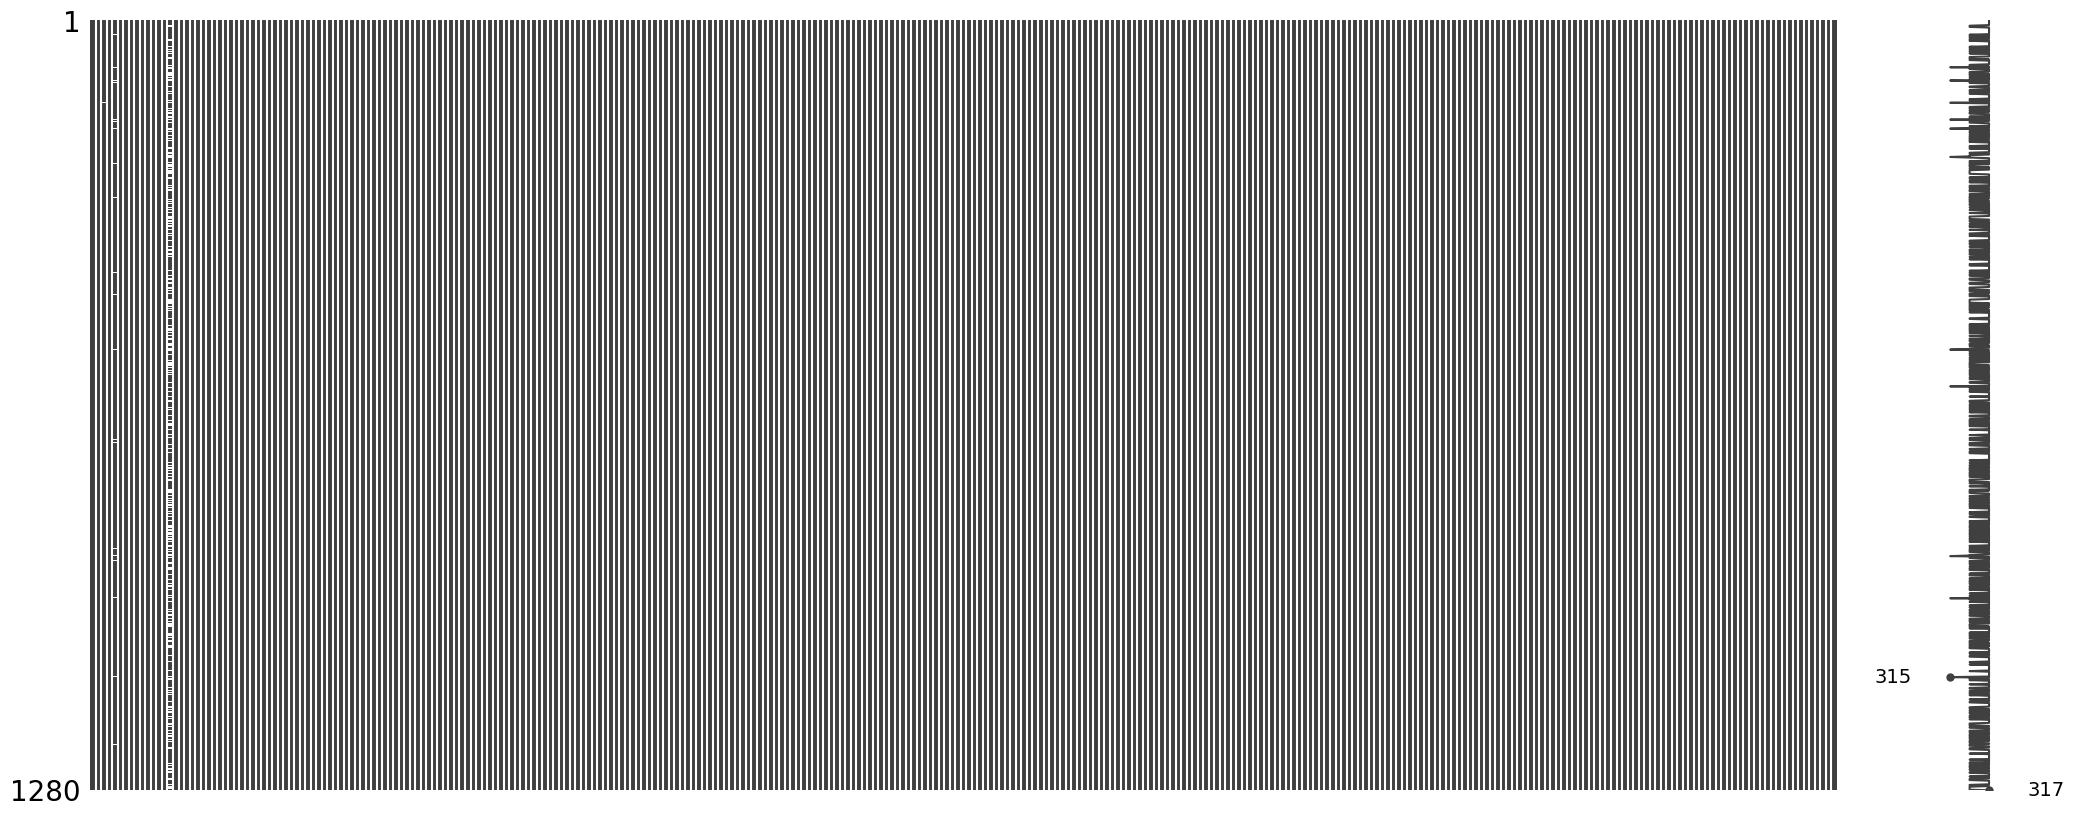

In [ ]:
mn.matrix(df)

In [10]:
threshold = .2
missing_vals = {}
for col in df.columns:
    missing_vals[col] = df[col].isnull().sum()
    ratio = df[col].isnull().sum() / len(df[col])
    if ratio > 0:
        print(f"{col} has {ratio:.2%} missing values")
        missing_vals[col] = ratio

job_posted_date has 0.08% missing values
job_state has 2.11% missing values
feature_10 has 34.84% missing values


In [11]:
threshold = .2
missing_vals_test = {}
for col in df_test.columns:
    missing_vals[col] = df_test[col].isnull().sum()
    ratio = df_test[col].isnull().sum() / len(df_test[col])
    if ratio > 0:
        print(f"{col} has {ratio:.2%} missing values")
        missing_vals_test[col] = ratio

job_state has 1.52% missing values
feature_10 has 36.77% missing values


### 4. Feature selection

In [87]:
cols = [col for col in df.columns if df[col].dtype in ['int', 'float']]
cols_nan = [col for col in df.columns if df[col].isnull().sum() > 0]

In [92]:
X = df.copy(deep=True)
X = X.drop(columns=cols_nan)
#cols.remove("feature_10")
X = X[cols]

scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X[cols])
y = df['salary_category_num']

chi2_scores, p_values = chi2(X, y)

In [93]:
cols_chi2 = dict(zip(cols, chi2_scores))
cols_chi2 = sorted(cols_chi2.items(), key=lambda x: x[1], reverse=True)
cols_chi2

[('feature_2', 24.89291408942553),
 ('job_desc_021', 12.357524717841857),
 ('job_desc_299', 11.292061729083674),
 ('job_desc_012', 10.877288297266695),
 ('job_desc_153', 9.50039728007598),
 ('job_desc_195', 8.855911881981651),
 ('job_desc_002', 8.351329498717917),
 ('job_desc_058', 7.709223304275165),
 ('job_desc_053', 7.130063925251214),
 ('job_desc_052', 7.059499066981931),
 ('job_desc_133', 6.608966868566458),
 ('job_desc_209', 6.559024249648765),
 ('job_desc_264', 6.461986987433066),
 ('job_desc_070', 6.416627476931389),
 ('job_desc_166', 6.411330461000691),
 ('job_desc_219', 6.390152543717479),
 ('job_desc_298', 6.075998779052418),
 ('job_desc_220', 6.062374596395),
 ('job_desc_117', 6.028256425697103),
 ('job_desc_162', 6.015820311494672),
 ('job_desc_170', 5.888370899197239),
 ('job_desc_289', 5.671961249535744),
 ('job_desc_078', 5.6369252619251675),
 ('job_desc_285', 5.3620867300634325),
 ('job_desc_076', 5.2098406339717895),
 ('job_desc_275', 5.1389091192219745),
 ('job_desc_

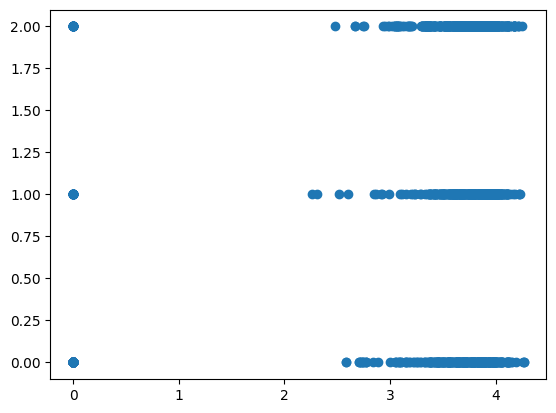

In [95]:
plt.scatter(x=df['job_desc_021'], y=df['salary_category_num'])